0.0
0.030303030303030304
0.06060606060606061
0.09090909090909091
0.12121212121212122
0.15151515151515152
0.18181818181818182
0.21212121212121213
0.24242424242424243
0.2727272727272727
0.30303030303030304
0.33333333333333337
0.36363636363636365
0.3939393939393939
0.42424242424242425
0.4545454545454546
0.48484848484848486
0.5151515151515151
0.5454545454545454
0.5757575757575758
0.6060606060606061
0.6363636363636364
0.6666666666666667
0.696969696969697
0.7272727272727273
0.7575757575757576
0.7878787878787878
0.8181818181818182
0.8484848484848485
0.8787878787878788
0.9090909090909092
0.9393939393939394
0.9696969696969697
1.0
1.0303030303030303
1.0606060606060606
1.0909090909090908
1.1212121212121213
1.1515151515151516
1.1818181818181819
1.2121212121212122
1.2424242424242424
1.2727272727272727
1.303030303030303
1.3333333333333335
1.3636363636363638
1.393939393939394
1.4242424242424243
1.4545454545454546
1.4848484848484849
1.5151515151515151
1.5454545454545454
1.5757575757575757
1.6060606060

MovieWriter ffmpeg unavailable; using Pillow instead.


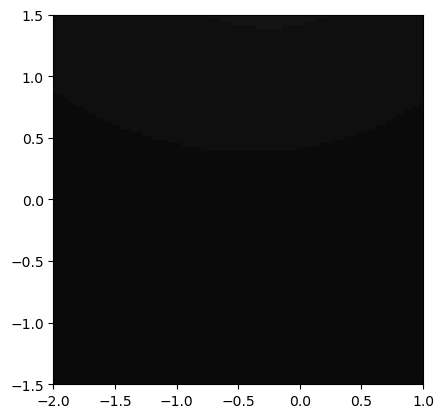

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Method to check if a given complex number converges or diverges based on Mandelbrot relation
# -1 if converges, iteration count at divergence if diverges
def check_convergence(complex_val, complex_func):
    NMAX = 100
    THRESHOLD = 50
    z = complex_val
    for i in range(NMAX):
        if abs(z) > THRESHOLD:
            return i
        z = complex_func(z, complex_val)
    return -1
        
def gen_fractal_mask(cfunc, translation):
    # create grid
    GRIDSIZE=100
    x, y = np.mgrid[-2:1:100j, -1.5:1.5:100j]
    c_grid = x + 1j*y
    mandelbrot_mask = np.zeros(shape=(GRIDSIZE,GRIDSIZE))
    for i in range(c_grid.shape[0]):
        for j in range(c_grid.shape[1]):
            mandelbrot_mask[i][j] = check_convergence(c_grid[i][j] + translation, cfunc)
    mandelbrot_mask = np.where(mandelbrot_mask > 0, mandelbrot_mask, 100)
    return mandelbrot_mask

fig = plt.figure()
all_masks = gen_fractal_mask(lambda z, c : z**2 + c, 0)
all_ims = []

for i in np.linspace(0, 3, 100):
    print(i)
    cfunc = lambda z, c : z**2 + c
    imaginary = 1j
    fractal = gen_fractal_mask(cfunc, i*imaginary)
    frac_im = plt.imshow(fractal.T, extent=[-2,1,-1.5,1.5], vmin=0, vmax=50)
    all_ims.append([frac_im])

ani = animation.ArtistAnimation(fig, all_ims, interval=50, blit=True, repeat_delay=500)

# z**2 + i*z + c
# ani.save('dynamic_image.gif')

# z**2 + i*c
# ani.save('dynamic_image2.gif')


ani.save('dynamic_image_test.gif')

plt.show()

    
# Generate image of the fractal using the mandelbrot_mask and save
# plt.imshow(all_masks[1].T, extent=[-2,1,-1.5,1.5])
#plt.gray()
#plt.savefig('mandelbrot.png')
#plt.show()